mouse chicken
=== Value summary paper
mouse  to  chicken
Ortho perf at 100, 50, 10
5941.0 532.0 158.0
=
Model perf at 100, 50, 10
7869.0 710.0 199.0
mouse rhesus
=== Value summary paper
mouse  to  rhesus
Ortho perf at 100, 50, 10
10012.0 4229.0 565.0
=
Model perf at 100, 50, 10
10908.0 4536.0 680.0
human cow
=== Value summary paper
human  to  cow
Ortho perf at 100, 50, 10
8070.0 6764.0 1273.0
=
Model perf at 100, 50, 10
9058.0 7531.0 1446.0
mouse rabbit
=== Value summary paper
mouse  to  rabbit
Ortho perf at 100, 50, 10
6919.0 2009.0 462.0
=
Model perf at 100, 50, 10
6864.0 1971.0 498.0
human pig
=== Value summary paper
human  to  pig
Ortho perf at 100, 50, 10
7056.0 5456.0 893.0
=
Model perf at 100, 50, 10
10982.0 7748.0 1464.0
human chicken
=== Value summary paper
human  to  chicken
Ortho perf at 100, 50, 10
5842.0 548.0 166.0
=
Model perf at 100, 50, 10
7388.0 744.0 202.0
mouse cow
=== Value summary paper
mouse  to  cow
Ortho perf at 100, 50, 10
8094.0 3077.0 523.0
=
Model perf at 1

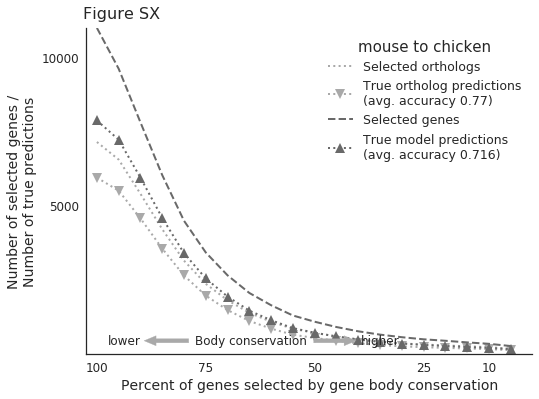

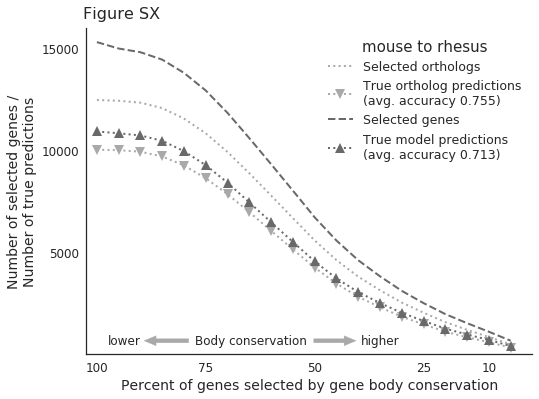

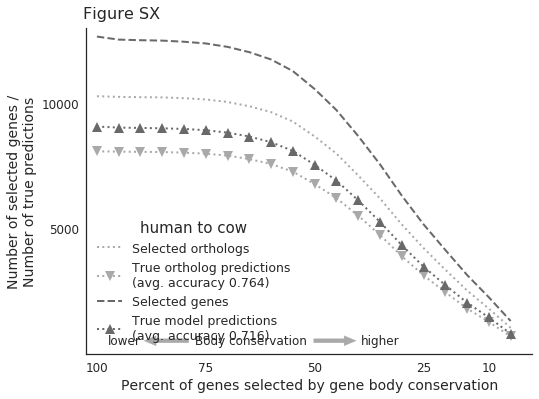

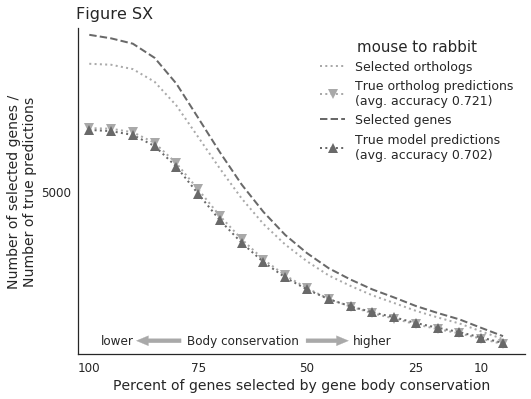

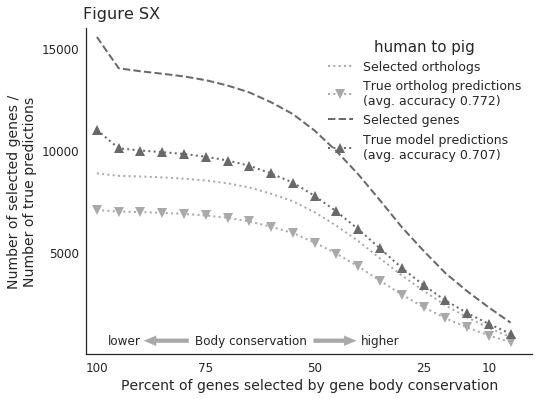

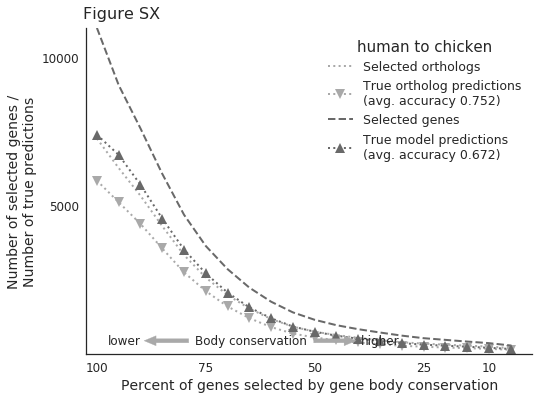

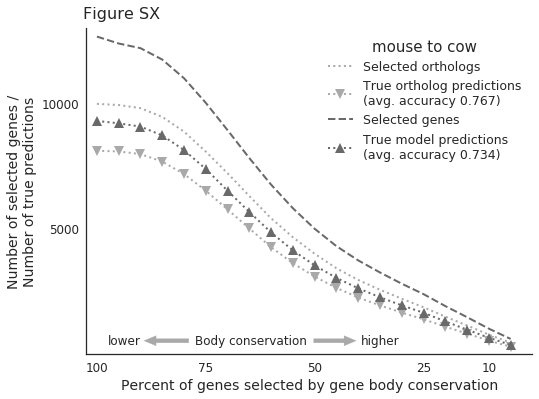

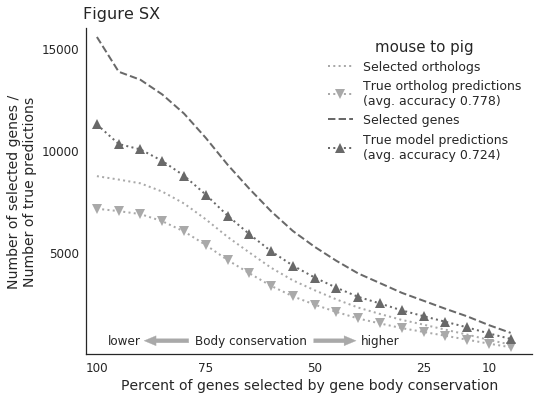

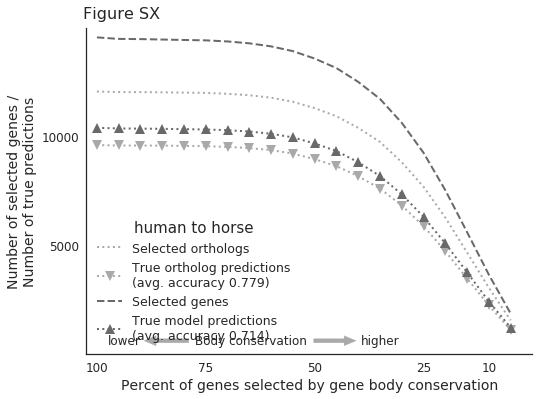

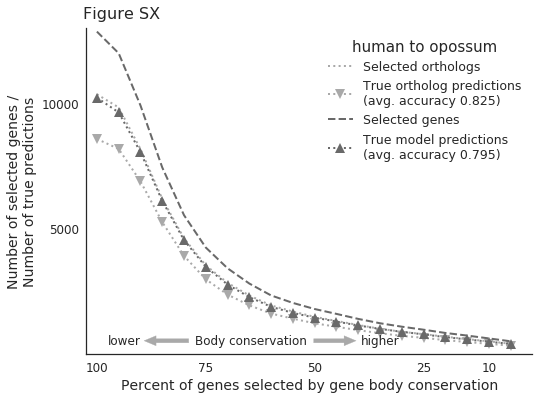

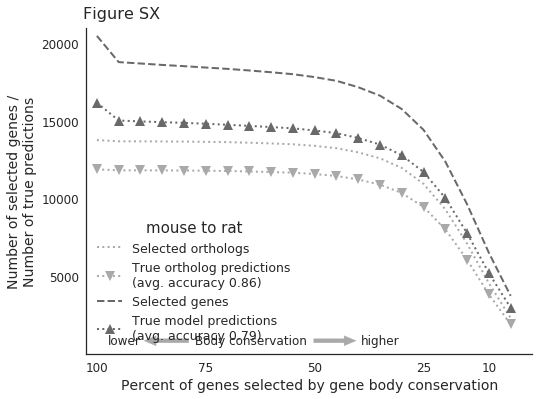

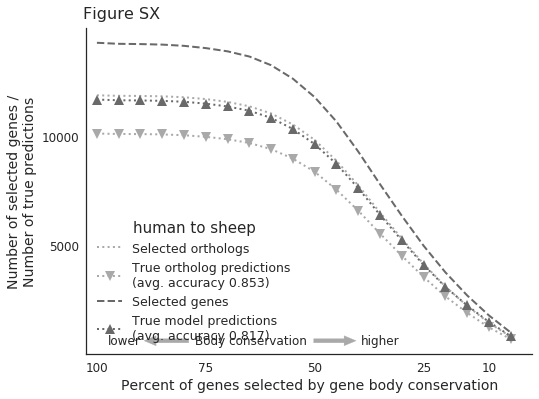

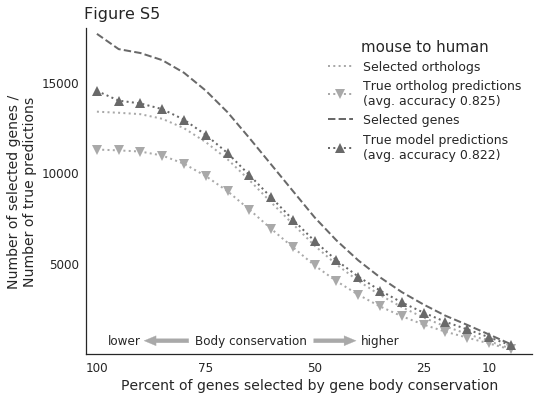

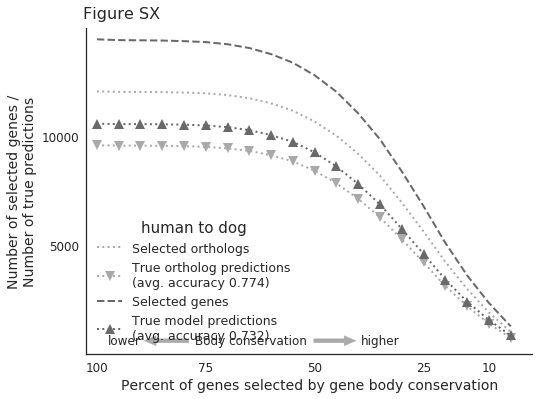

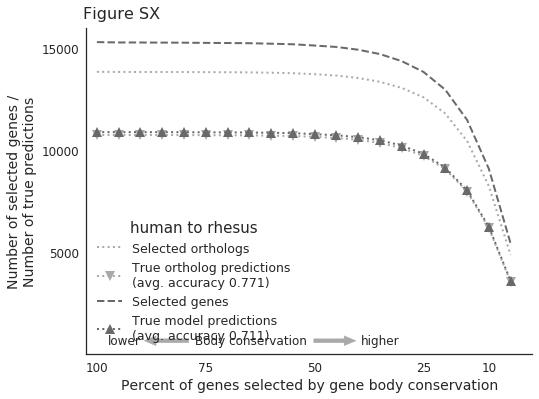

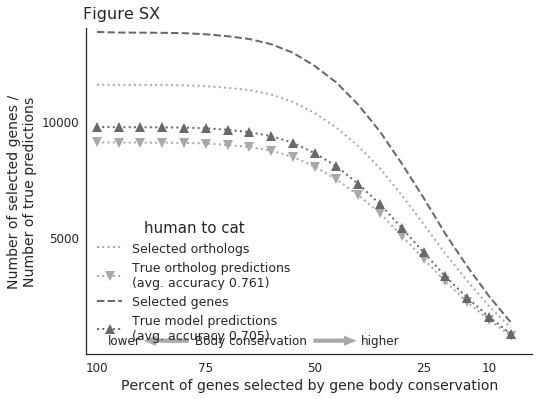

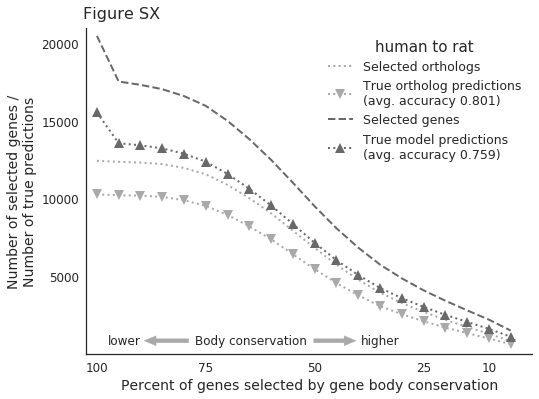

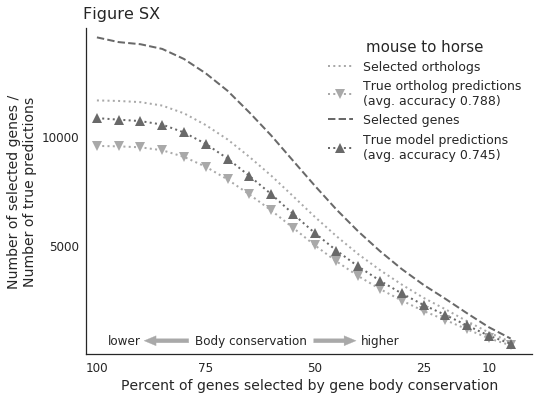

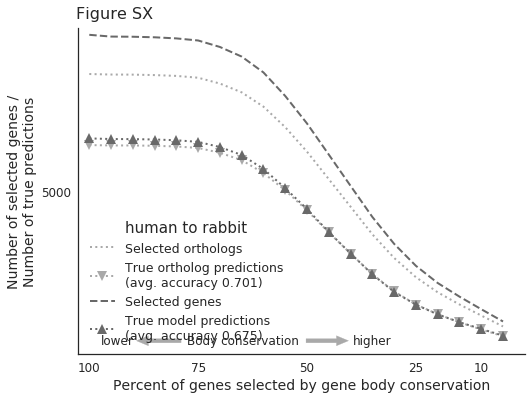

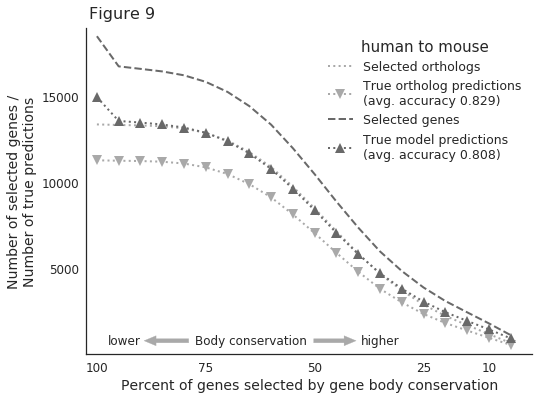

In [26]:
%matplotlib inline

import os as os
import numpy as np
import numpy.random as rng
import json as js
import pickle as pck
import collections as col
import operator as op
import functools as fnt
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
from scipy.stats import mannwhitneyu as mwu

# What is this?
# Plot model performance evaluated
# on gene subsets selected by gene
# locus conservation

date = '20180618'

sns.set(style='white',
        font_scale=1.25,
        rc={'font.family': ['sans-serif'],
            'font.sans-serif': ['DejaVu Sans']})

fhgfs_base = '/TL/deep/fhgfs/projects/pebert/thesis'
stat_folder = os.path.join(fhgfs_base, 'projects/cross_species/processing/norm/task_summarize')
stat_file = os.path.join(stat_folder, 'agg_expstat_est.h5')
ortho_folder = os.path.join(fhgfs_base, 'projects/cross_species/processing/norm/task_ortho_pred')
ortho_pred = os.path.join(ortho_folder, 'orthopred_odb_v9.h5')

cache_dir = os.path.join(fhgfs_base, 'projects/cross_species/processing/norm/caching/notebooks')

conf_folder = '/home/pebert/work/code/mpggit/crossspecies/graphics'

plot_labels = js.load(open(os.path.join(conf_folder, 'labels', 'cs_labels.json'), 'r'))
plot_colors = js.load(open(os.path.join(conf_folder, 'colors', 'cs_colors.json'), 'r'))
plot_shapes = js.load(open(os.path.join(conf_folder, 'shapes', 'cs_shapes.json'), 'r'))

run_exec_status = True

out_folder = '/TL/deep-external01/nobackup/pebert/cloudshare/mpiinf/phd/chapter_projects/crossspecies/figures/pub'
save_figures = False

def exec_status():
    cache_data = os.path.join(cache_dir, '{}_plot_perfcomp_aln-rank.pck'.format(date))
    fullmodel = 'can'
    if not run_exec_status:
        return False
    if os.path.isfile(cache_data):
        model_perf = pck.load(open(cache_data, 'rb'))
    else:
        model_perf = collect_ortho_perf(ortho_pred, fullmodel)
        model_perf = collect_model_stat_perf(stat_file, model_perf, 'pos', fullmodel)
        with open(cache_data, 'wb') as out:
            print('Writing cache file for status line plot')
            pck.dump(model_perf, out)
    # mental note
    #bins = np.arange(0, 105, 5)
    #bins[-1] += 1
    #bin_idx = [(i, b) for i, b in enumerate(bins)]
    idx_0 = 0
    idx_50 = 10
    idx_90 = 18
    figure_keys = {('human', 'mouse'): ('9', 'main', 'S6A'),
                   ('mouse', 'human'): ('S5', 'supp', 'S6B')}
    for (spec_a, spec_b), perf in model_perf.items():
        print(spec_a, spec_b)
        fk, subfolder, sfk = figure_keys.get((spec_a, spec_b), ('SX', 'supp', 'SX'))
        orth_perf = perf['data_orth_pair']['positives'].mean(axis=0).round(decimals=0)
        orth_max = perf['data_orth_pair']['relevant'].median(axis=0)
        
        orth_acc_mean = perf['data_orth_pair']['accuracy'].mean(axis=0)
        orth_acc_std = perf['data_orth_pair']['accuracy'].std(axis=0)
        
        orth_acc_avg = orth_acc_mean.mean().round(3)
        
        datavalues = [orth_max, orth_perf]
        linecolors = ['darkgrey', 'darkgrey']
        linestyles = ['dotted', 'dotted']
        
        spec_color = plot_colors['species'][spec_b]['rgb']
        model_perf = perf['data_crp_{}_wg'.format(fullmodel)]['positives'].mean(axis=0).round(decimals=0)
        model_max = perf['data_crp_{}_wg'.format(fullmodel)]['relevant'].median(axis=0)
        
        model_acc_mean = perf['data_crp_{}_wg'.format(fullmodel)]['accuracy'].mean(axis=0)
        model_acc_std = perf['data_crp_{}_wg'.format(fullmodel)]['accuracy'].std(axis=0)
        
        model_acc_avg = model_acc_mean.mean().round(3)
        
        
        datavalues.extend([model_max, model_perf])
        
        # summary of values for paper
        print('=== Value summary paper')
        print(spec_a, ' to ', spec_b)
        print('Ortho perf at 100, 50, 10')
        print(orth_perf[idx_0], orth_perf[idx_50], orth_perf[idx_90])
        print('=')
        print('Model perf at 100, 50, 10')
        print(model_perf[idx_0], model_perf[idx_50], model_perf[idx_90])
                
        #linecolors.extend([spec_color, spec_color])
        linecolors.extend(['dimgrey', 'dimgrey'])
        linestyles.extend(['dashed', 'dotted'])
        linelabels = ['Selected orthologs', 'True ortholog predictions\n(avg. accuracy {})'.format(orth_acc_avg),
                      'Selected genes', 'True model predictions\n(avg. accuracy {})'.format(model_acc_avg)]
        markershapes = ['', 'v', '', '^']
         
        plot_title = 'Gene expression prediction: {}-to-{} model'.format(spec_a, spec_b)
        
        y_max = datavalues[2].max()
        if np.round(y_max, -3) < y_max:
            y_max = np.round(y_max, -3) + 1000
        else:
            y_max = np.round(y_max, -3)
        
        fig, exart = plot_perf_linechart(datavalues, [orth_acc_mean, model_acc_mean], y_max,
                                         linelabels, linecolors, linestyles,
                                         markershapes, spec_a, spec_b, 'Figure {}'.format(fk))

        if save_figures:
            outname = 'fig_{}_{}-{}_testperf_aln-rank'.format(fk, spec_a, spec_b)
            
            outpath = os.path.join(out_folder, subfolder, 'raw', outname + '.svg')
            fig.savefig(outpath, bbox_extra_artists=exart, bbox_inches='tight')
            
            outpath = os.path.join(out_folder, subfolder, 'png', outname + '.png')
            fig.savefig(outpath, bbox_extra_artists=exart, bbox_inches='tight', dpi=300)
            
            outpath = os.path.join(out_folder, subfolder, outname + '.pdf')
            fig.savefig(outpath, bbox_extra_artists=exart, bbox_inches='tight')
                        
    return True
       

def plot_perf_linechart(datavals, accvals, ylim,
                        linelabels, linecolor, linestyle, linemarker,
                        target, query, title):
    """
    """    
    fig, ax = plt.subplots(figsize=(8, 6))
    extra_artists = []
    ax.set_xlim(-0.5, datavals[0].size)
    ax.set_ylim(-1, ylim)
    if ylim < 10000:
        y_ticks = np.arange(2500, ylim, 2500, dtype=np.int16)
    else:
        y_ticks = np.arange(5000, ylim, 5000, dtype=np.int16)
    ax.set_yticks(y_ticks)
    ax.set_yticklabels(map(str, y_ticks), fontsize=12)
    ax.set_xticks([0, 5, 10, 15, datavals[0].size - 2])
    ax.set_xticklabels(['100', '75', '50', '25', '10'], fontsize=12)
    
    ylabel = 'Number of selected genes /\nNumber of true predictions'
    xlabel = 'Percent of genes selected by gene body conservation'
    
    x_values = np.arange(datavals[0].size)

    handles = []
    for y_values, label, color, style, marker in zip(datavals,
                                                     linelabels,
                                                     linecolor,
                                                     linestyle,
                                                     linemarker):
        line = ax.plot(x_values, y_values.values, linestyle=style, color=color, marker=marker,
                       markersize=10, linewidth=2, label=label)
        handles.append(line)
        
    handles, labels = ax.get_legend_handles_labels()
    plt.legend(title='{} to {}'.format(target, query))    
    
    extra_artists = []
    
    ax.annotate(s='lower', xy=(0.05, 0.03), xycoords='axes fraction',
                fontsize=12)
    
    ax.annotate(s='', xy=(0.13, 0.04), xytext=(0.23, 0.04), xycoords='axes fraction',
                arrowprops={'width': 4, 'headwidth': 10,
                            'headlength': 12, 'color': 'darkgrey'})
    
    ax.annotate(s='Body conservation', xy=(0.243, 0.03), xycoords='axes fraction',
                fontsize=12)
    
    ax.annotate(s='', xy=(0.605, 0.04), xytext=(0.51, 0.04), xycoords='axes fraction',
                arrowprops={'width': 4, 'headwidth': 10,
                            'headlength': 12, 'color': 'darkgrey'})
    
    ax.annotate(s='higher', xy=(0.615, 0.03), xycoords='axes fraction',
                fontsize=12)
    
    ax.set_ylabel(ylabel, fontsize=14)
    ax.set_xlabel(xlabel, fontsize=14)
    tt = ax.set_title(title, fontsize=16)
    tt.set_position([0.08, 1.01])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
         
    return fig, extra_artists


def collect_model_stat_perf(fpath, data_collect, scenario, model_type):
    """
    """
    with pd.HDFStore(fpath, 'r') as hdf:
        load_keys = [k for k in hdf.keys() if k.startswith('/'.join(['', scenario, model_type])) and k.endswith('/aln')]
        for k in load_keys:
            md = hdf[k.replace('/aln', '/metadata')]
            spec_a = md.loc['target_spec',:][0]
            spec_b = md.loc['query_spec',:][0]
            perf = hdf[k]
            
            model = 'data_crp_{}_wg'.format(model_type)
            if (spec_a, spec_b) not in data_collect:
                data_collect[(spec_a, spec_b)] = {model: {'positives': None,
                                                          'relevant': None,
                                                          'accuracy': None}}
            relevant = perf.loc[['relevant'], :]
            positives = perf.loc[['positives'], :]
            accuracy = perf.loc[['accuracy'], :]
            
            model_perf = data_collect[(spec_a, spec_b)][model]
            if model_perf['relevant'] is None:
                model_perf['relevant'] = relevant
                model_perf['positives'] = positives
                model_perf['accuracy'] = accuracy
                data_collect[(spec_a, spec_b)][model] = model_perf
            else:
                relevant = pd.concat([model_perf['relevant'], relevant], ignore_index=True, axis=0)
                positives = pd.concat([model_perf['positives'], positives], ignore_index=True, axis=0)
                accuracy = pd.concat([model_perf['accuracy'], accuracy], ignore_index=True, axis=0)
                model_perf['relevant'] = relevant
                model_perf['positives'] = positives
                model_perf['accuracy'] = accuracy
                data_collect[(spec_a, spec_b)][model] = model_perf
    return data_collect


def collect_ortho_perf(fpath, model):
    """
    """
    collector = dict()
    with pd.HDFStore(fpath, 'r') as hdf:
        load_keys = [k for k in hdf.keys() if k.startswith('/pos/pair') and k.endswith('/aln')]
        for k in load_keys:
            parts = k.split('/')
            spec_a, spec_b = parts[3], parts[4]
            
            perf = hdf[k]
                        
            if (spec_a, spec_b) not in collector:
                collector[(spec_a, spec_b)] = {'data_orth_pair': {'relevant': None,
                                                                  'positives': None,
                                                                  'accuracy': None},
                                               'data_crp_{}_wg'.format(model): {'positives': None,
                                                                                'relevant': None,
                                                                                'accuracy': None}}
            relevant = perf.loc[['relevant'], :]
            positives = perf.loc[['positives'], :]
            accuracy = perf.loc[['accuracy'], :]
            
            orth_perf = collector[(spec_a, spec_b)]['data_orth_pair']
            if orth_perf['relevant'] is None:
                orth_perf['relevant'] = relevant
                orth_perf['positives'] = positives
                orth_perf['accuracy'] = accuracy
                collector[(spec_a, spec_b)]['data_orth_pair'] = orth_perf
            else:
                relevant = pd.concat([orth_perf['relevant'], relevant], ignore_index=True, axis=0)
                positives = pd.concat([orth_perf['positives'], positives], ignore_index=True, axis=0)
                accuracy = pd.concat([orth_perf['accuracy'], accuracy], ignore_index=True, axis=0)
                orth_perf['relevant'] = relevant
                orth_perf['positives'] = positives
                orth_perf['accuracy'] = accuracy
                collector[(spec_a, spec_b)]['data_orth_pair'] = orth_perf
    return collector               
                

execd = exec_status()
if execd:
    print('Status plot created')